# Introdução

O objetivo desse projeto é prever se o cliente irá ou não pagar o empréstimo. Vale salientar que para essa base de dados, quando tiver "0" na coluna "default" quer dizer que o cliente pagou e quando tiver "1", quer dizer que o cliente não pagou o empréstimo. É um projeto de Classificação onde foi usados os seguintes modelos de Machine Learning: Naive Bayes, Árvore de Decisão, Random Forest, kNN, Regressão Logística, SVM e Redes Neurais.

# Importando Bibliotecas

In [2]:
import pickle
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

# Carregando os Dados

In [3]:
df = pd.read_csv('credit_data.csv')

In [4]:
df

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


## Algumas análises

In [5]:
# Visualizar os 10 primeiros
df.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [6]:
# Visualizar os 5 últimos
df.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [7]:
# Algumas estatísticas
df.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [8]:
df.index

RangeIndex(start=0, stop=2000, step=1)

In [9]:
df.columns

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')

## Aplicando alguns filtros para entender melhor as informações

In [10]:
# Puxando a ficha do cliente que ganha mais
df.loc[df['income'] >= 69995]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [11]:
# Puxando a ficha do cliente que tem menos dívida
df.loc[df['loan'] <= 1.38]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


In [12]:
# 0 = Pagou o empréstimo e 1 = não pagou
np.unique(df['default'], return_counts = True)

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

## Criando alguns gráficos simples para entender os dados visualmente

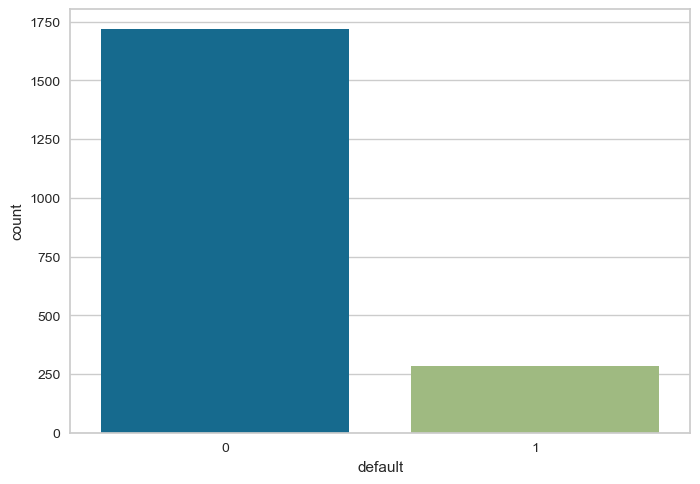

In [13]:
sns.countplot(x = df['default']);

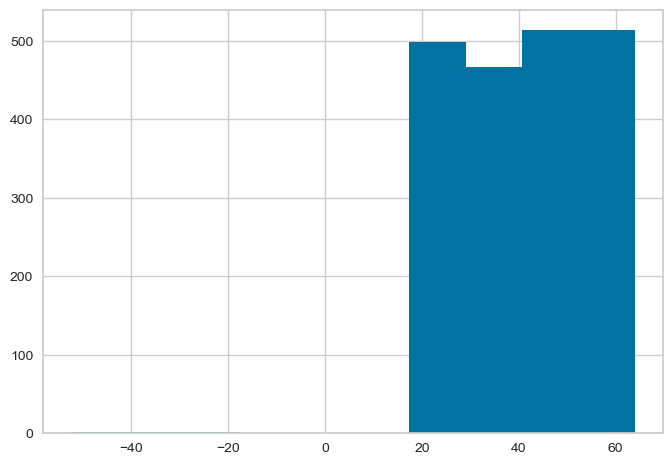

In [14]:
plt.hist(x = df['age']);

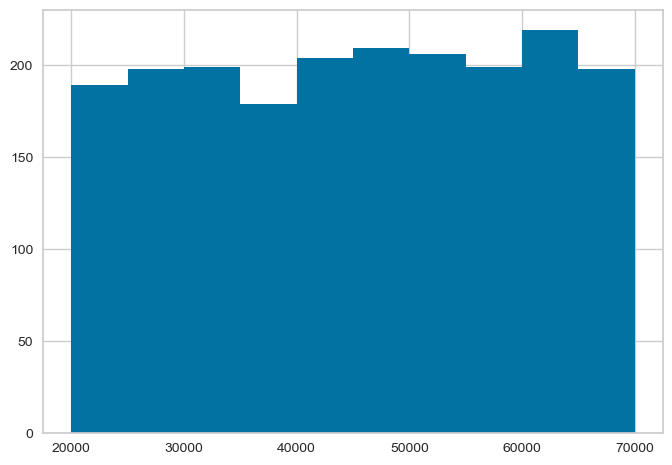

In [15]:
plt.hist(x = df['income']);

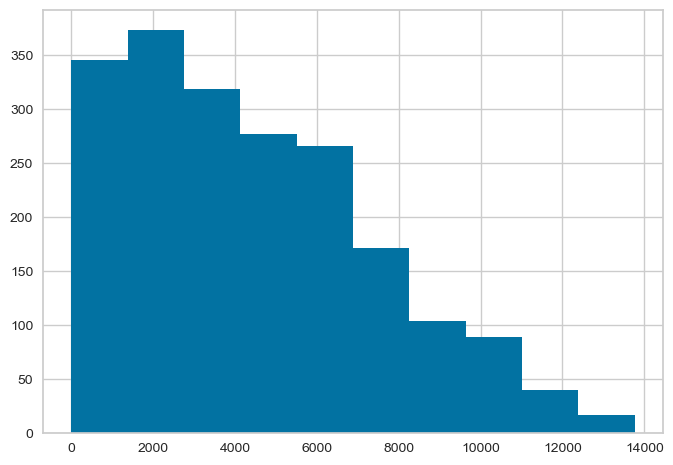

In [16]:
plt.hist(x = df['loan']);

## Tratamento de Dados

In [17]:
df.loc[df['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [18]:
df.loc[df['age'] < 0].index

Int64Index([15, 21, 26], dtype='int64')

In [19]:
# Apagar somente os valores inconsistentes
df2 = df.drop(df.loc[df['age'] < 0].index)
df2

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [20]:
df2.loc[df2['age'] < 0]

,clientid,income,age,loan,default


In [21]:
# Preencher os valores com a média
df.loc[df['age'] > 0].mean()

clientid     1003.431795
income      45328.856915
age            40.927700
loan         4443.240892
default         0.141926
dtype: float64

In [22]:
df.loc[df['age'] < 0, 'age'] = 40.92

In [23]:
df.loc[df['age'] < 0]

,clientid,income,age,loan,default


In [24]:
df.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


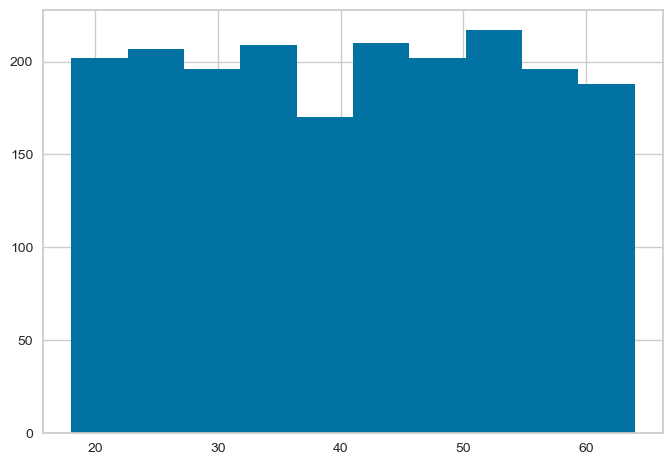

In [25]:
plt.hist(x = df['age']);

In [26]:
# Tratamento de valores faltantes
df.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [27]:
df.loc[df['age'].isnull()]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [28]:
# Preenchendo os valores nulos com a média
df['age'].fillna(df['age'].mean(), inplace = True)

In [29]:
df.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [30]:
df.iloc[28:32]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
29,30,58842.891308,54.510948,10871.186790,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [31]:
df.loc[(df['clientid'] == 29) | (df['clientid'] == 31) | (df['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [32]:
df.loc[df['clientid'].isin([29,31,32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


## Divisão entre previsores e classe

In [33]:
X_credit = df.iloc[:, 1:4].values

In [34]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [35]:
type(X_credit)

numpy.ndarray

In [36]:
y_credit = df.iloc[:, 4].values

In [37]:
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
type(y_credit)

numpy.ndarray

## Escalonamento dos Valores

Como os modelos de Machine Learning usam bastante cálculos matemáticos, precisamos deixar os valores na mesma escala para nenhuma variável ter um peso maior que a outra.

In [39]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [40]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [41]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [42]:
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [43]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [44]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

In [45]:
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

## Divisao das bases em treinamento e teste

In [46]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size= 0.25, random_state= 0)

In [47]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [48]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

## Salvar as variáveis

In [49]:
with open('credit.pkl', mode = 'wb') as f:
    pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

## Ler as variáveis

In [50]:
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [51]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [52]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

# Treinamento com Naive Bayes

In [53]:
naive_credit_data = GaussianNB()

In [54]:
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [55]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [56]:
accuracy_score(y_credit_teste, previsoes)

0.938

In [57]:
confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]], dtype=int64)

0.938

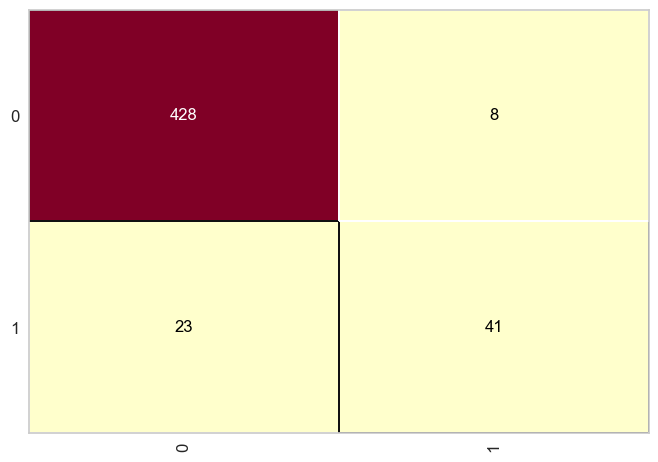

In [58]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

Temos 428 Clientes que pagam o empréstimo(0) e foram classificados corretamente, e também temos 8 Clientes que pagam e foram classificados como se não pagasse(1). Ja na parte de não Pagar, temos 41 Clientes que não pagam e que foram classificados corretamente que não pagam e por fim temos 23 Clientes que não pagam e foram classificados que pagam. O modelo acertou 469 registros e errou 31, obtendo uma acurácia de 93,80%.

In [59]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



Podemos observar que o algorítimo consegue identificar corretamente 98% dos Clientes que pagam o empréstimo e quando o algorítimo identifica o cliente que paga o empréstimo ele tem uma precisão de acerto de 95%. Já para os que não pagam, O algorítimo consegue identificar corretamente apenas 64% e tem uma precisão de 84%. Ou seja, mesmo tendo uma acurácia de 93.8%, ainda podemos melhorar a performace voltada para a classe '1'.

# Treinamento com Árvore de Decisão

In [60]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [61]:
previsoes = arvore_credit.predict(X_credit_teste)

In [62]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

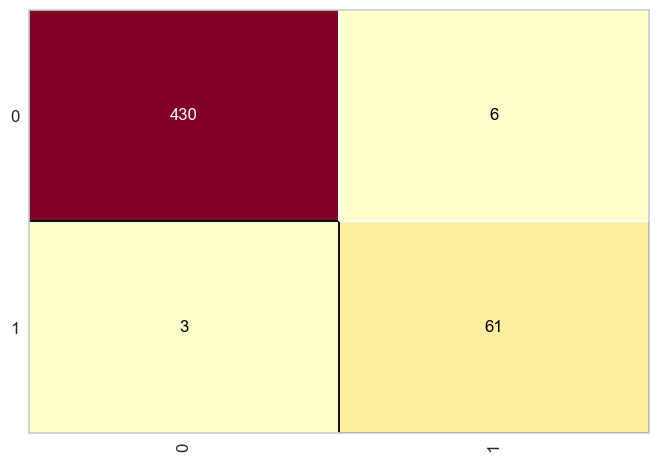

In [63]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

Temos 430 Clientes que pagam o empréstimo(0) e foram classificados corretamente, e também temos 6 Clientes que pagam e foram classificados como se não pagasse(1). Ja na parte de não Pagar, temos 61 Clientes que não pagam e que foram classificados corretamente que não pagam e por fim temos 3 Clientes que não pagam e foram classificados que pagam. O modelo acertou 491 registros e errou 9, obtendo uma acurácia de 98,20%.

In [64]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



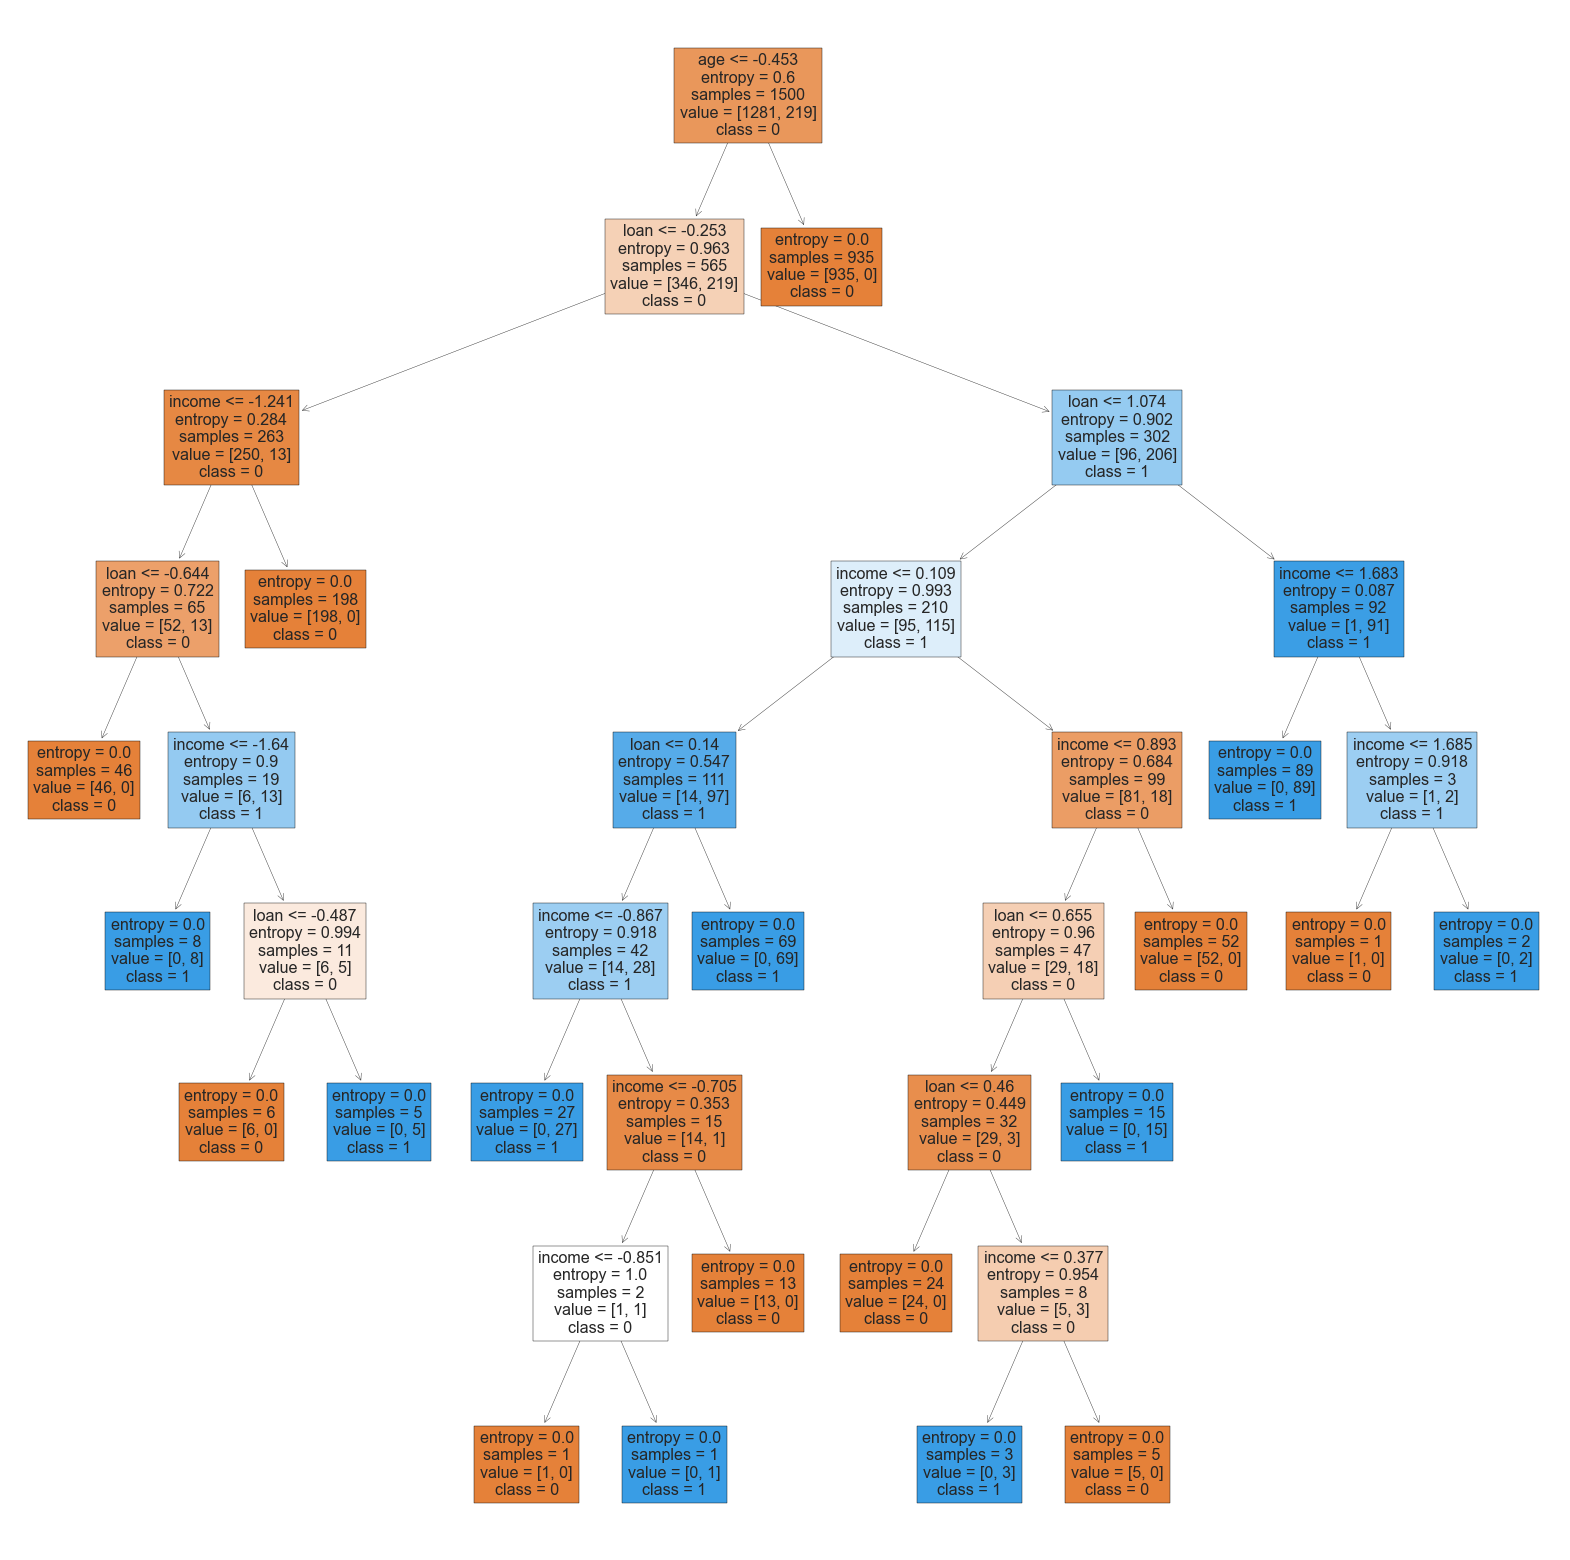

In [65]:
# Visualizando a Árvore
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True)
fig.savefig('arvore_credit.png')

# Treinamento com Random Forest

In [66]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [67]:
previsoes = random_forest_credit.predict(X_credit_teste)

In [68]:
accuracy_score(y_credit_teste, previsoes)

0.984

0.984

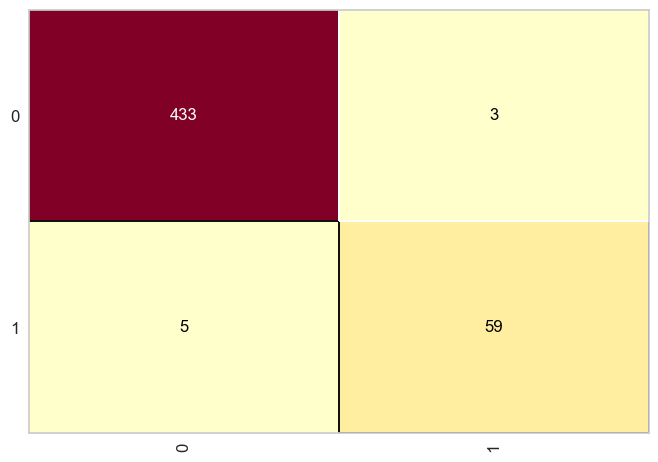

In [69]:
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

Temos 433 Clientes que pagam o empréstimo(0) e foram classificados corretamente, e também temos 3 Clientes que pagam e foram classificados como se não pagasse(1). Ja na parte de não Pagar, temos 59 Clientes que não pagam e que foram classificados corretamente que não pagam e por fim temos 5 Clientes que não pagam e foram classificados que pagam. O modelo acertou 492 registros e errou 8, obtendo uma acurácia de 98,40%.

In [70]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



# Treinamento com kNN

In [71]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [72]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    previsoes = knn_credit.predict(X_credit_teste)

In [73]:
accuracy_score(y_credit_teste, previsoes)

0.986

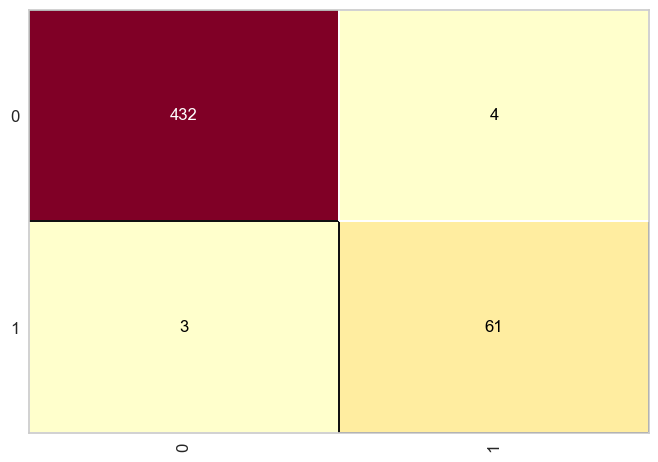

In [74]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    previsoes = knn_credit.predict(X_credit_teste)
    cm = ConfusionMatrix(knn_credit)
    cm.fit(X_credit_treinamento, y_credit_treinamento)
    cm.score(X_credit_teste, y_credit_teste)

Temos 432 Clientes que pagam o empréstimo(0) e foram classificados corretamente, e também temos 4 Clientes que pagam e foram classificados como se não pagasse(1). Ja na parte de não Pagar, temos 61 Clientes que não pagam e que foram classificados corretamente que não pagam e por fim temos 3 Clientes que não pagam e foram classificados que pagam. O modelo acertou 493 registros e errou 7, obtendo uma acurácia de 98,60%.

In [75]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



# Treinamento com Regressão Logística

In [76]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(X_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [77]:
logistic_credit.intercept_

array([-6.02976095])

In [78]:
logistic_credit.coef_

array([[-2.54927091, -3.72279861,  3.93940349]])

In [79]:
previsoes = logistic_credit.predict(X_credit_teste)

In [80]:
accuracy_score(y_credit_teste, previsoes)

0.946

0.946

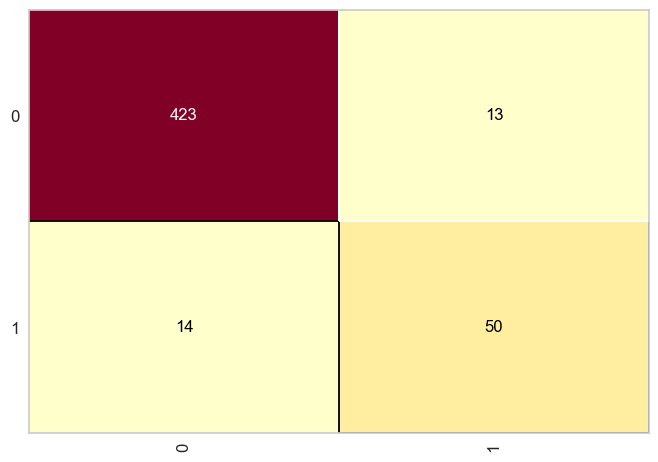

In [81]:
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

Temos 423 Clientes que pagam o empréstimo(0) e foram classificados corretamente, e também temos 13 Clientes que pagam e foram classificados como se não pagasse(1). Ja na parte de não Pagar, temos 50 Clientes que não pagam e que foram classificados corretamente que não pagam e por fim temos 14 Clientes que não pagam e foram classificados que pagam. O modelo acertou 473 registros e errou 27, obtendo uma acurácia de 94,60%.

In [82]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



# Treinamento com SVM

In [83]:
svm_credit = SVC(kernel='linear', random_state=1, C = 1.0)
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(kernel='linear', random_state=1)

In [84]:
previsoes = svm_credit.predict(X_credit_teste)

In [85]:
accuracy_score(y_credit_teste, previsoes)

0.946

0.946

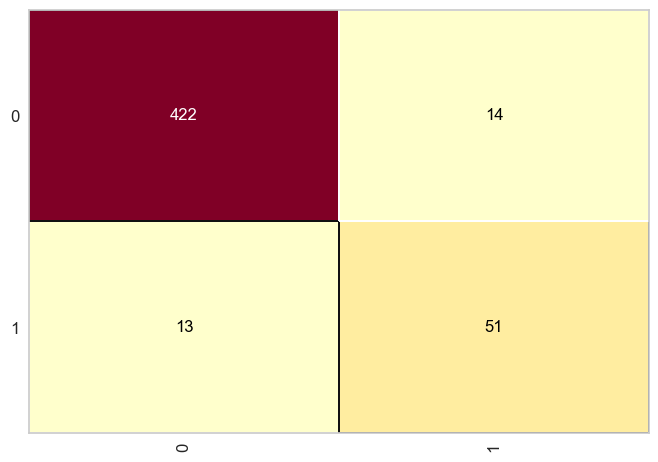

In [86]:
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [87]:
svm_credit = SVC(kernel='poly', random_state=1, C = 1.0)
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(kernel='poly', random_state=1)

In [88]:
previsoes = svm_credit.predict(X_credit_teste)

In [89]:
accuracy_score(y_credit_teste, previsoes)

0.968

0.968

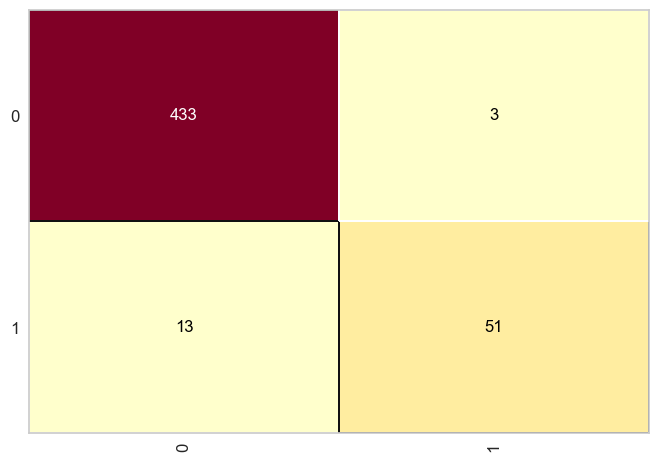

In [90]:
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [91]:
svm_credit = SVC(kernel='sigmoid', random_state=1, C = 1.0)
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(kernel='sigmoid', random_state=1)

In [92]:
previsoes = svm_credit.predict(X_credit_teste)

In [93]:
accuracy_score(y_credit_teste, previsoes)

0.838

0.838

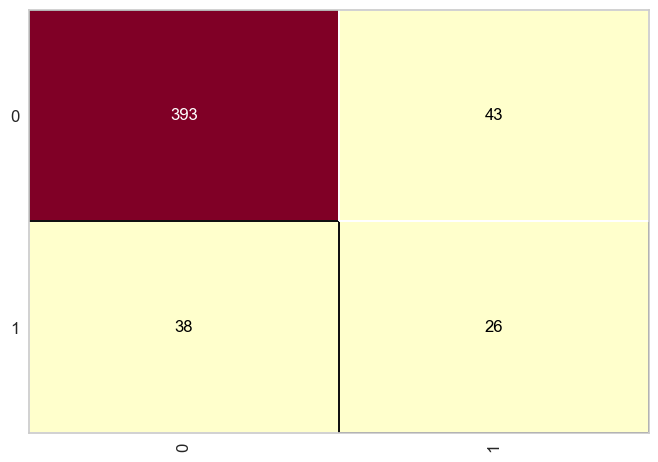

In [94]:
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [95]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 1.0)
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(random_state=1)

In [96]:
previsoes = svm_credit.predict(X_credit_teste)

In [97]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

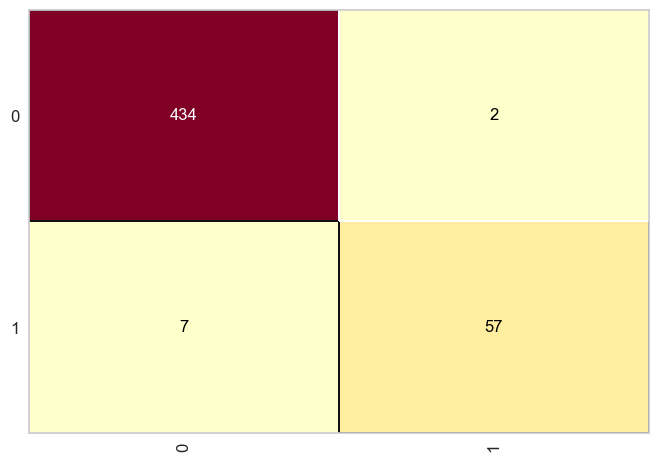

In [98]:
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [99]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0)
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(C=2.0, random_state=1)

In [100]:
previsoes = svm_credit.predict(X_credit_teste)

In [101]:
accuracy_score(y_credit_teste, previsoes)

0.988

0.988

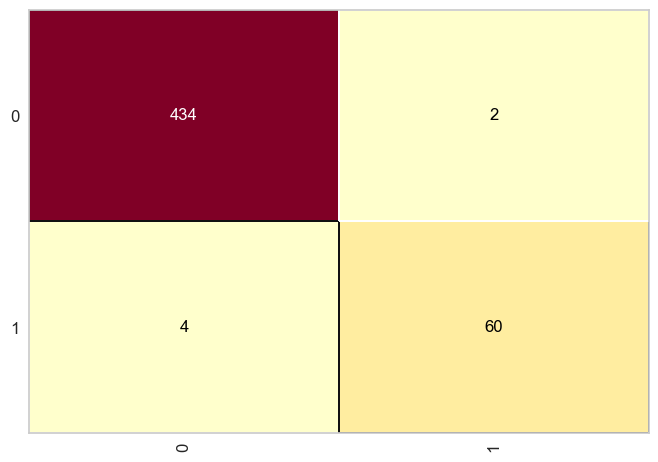

In [102]:
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

Temos 434 Clientes que pagam o empréstimo(0) e foram classificados corretamente, e também temos 2 Clientes que pagam e foram classificados como se não pagasse(1). Ja na parte de não Pagar, temos 60 Clientes que não pagam e que foram classificados corretamente que não pagam e por fim temos 4 Clientes que não pagam e foram classificados que pagam. O modelo acertou 494 registros e errou 6, obtendo uma acurácia de 98,80%.

In [103]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



# Treinamento com Redes Neurais

In [104]:
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=False, tol=0.0000100, 
                                   solver='adam', activation= 'relu',
                                   hidden_layer_sizes = (2,2))
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=1500, tol=1e-05)

In [105]:
previsoes = rede_neural_credit.predict(X_credit_teste)

In [106]:
accuracy_score(y_credit_teste, previsoes)

0.998

0.998

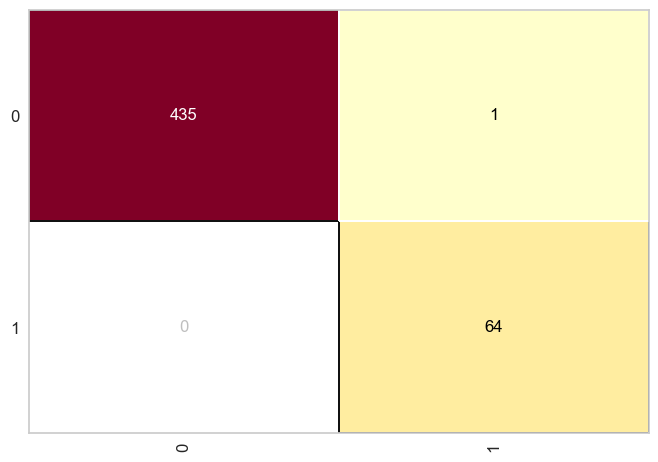

In [107]:
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

Temos 435 Clientes que pagam o empréstimo(0) e foram classificados corretamente, e também temos apenas 1 Cliente que paga e foi classificado como se não pagasse(1). Ja na parte de não Pagar, temos 64 Clientes que não pagam e que foram classificados corretamente que não pagam e por fim temos 0 Clientes que não pagam e foram classificados que pagam. O modelo acertou 499 registros e errou apenas 1, obtendo uma acurácia de 99,80%.

In [108]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      1.00      0.99        64

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



# Tuning dos parâmetros com GridSearch

Como os Modelos possuem vários parâmetros, vamos descobrir qual a melhor combinação desses parâmetros para esse conjunto de dados

In [109]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [110]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

### Concatenando a base de treinamento e de testes

In [111]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

(2000, 3)

In [112]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

## Árvore de Decisão

In [113]:
parametros = {'criterion' : ['gini', 'entropy'],
              'splitter' : ['best', 'random'],
              'min_samples_split' : [2, 5, 10],
              'min_samples_leaf' : [1, 5, 10]
             }

In [114]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


## Random Forest

In [115]:
parametros = {'criterion' : ['gini', 'entropy'],
              'n_estimators' : [10, 40, 100, 150],
              'min_samples_split' : [2, 5, 10],
              'min_samples_leaf' : [1, 5, 10]
             }

In [116]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
0.9855


## kNN

In [117]:
parametros = {'n_neighbors' : [3, 5, 10, 20],
              'p' : [1, 2]
             }

In [118]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
    grid_search.fit(X_credit, y_credit)
    melhores_parametros = grid_search.best_params_
    melhor_resultado = grid_search.best_score_
    print(melhores_parametros)
    print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


## Regressão Logística

In [119]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [120]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


## SVM

In [121]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [122]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


## Redes neurais

In [123]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [124]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
    grid_search.fit(X_credit, y_credit)
    melhores_parametros = grid_search.best_params_
    melhor_resultado = grid_search.best_score_

In [125]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9970000000000001


# Validação Cruzada

Sabendo os melhores parâmetros para esse conjunto de dados, agora vamos realizar a validação cruzada

In [126]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
    resultados_arvore.append(scores.mean())

    random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
    scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
    resultados_random_forest.append(scores.mean())

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
    resultados_knn.append(scores.mean())

    logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
    scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
    resultados_logistica.append(scores.mean())

    svm = SVC(kernel = 'rbf', C = 2.0)
    scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
    resultados_svm.append(scores.mean())

    rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
    scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
    resultados_rede_neural.append(scores.mean())

In [127]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.9860,0.9860,0.9815,0.9475,0.9845,0.9965
1,0.9835,0.9830,0.9800,0.9465,0.9840,0.9975
2,0.9905,0.9855,0.9795,0.9470,0.9865,0.9970
3,0.9875,0.9835,0.9780,0.9460,0.9850,0.9960
4,0.9880,0.9810,0.9820,0.9465,0.9850,0.9970
5,0.9885,0.9820,0.9780,0.9465,0.9845,0.9970
6,0.9880,0.9835,0.9805,0.9470,0.9860,0.9970
7,0.9875,0.9835,0.9800,0.9480,0.9850,0.9975
8,0.9855,0.9825,0.9795,0.9465,0.9840,0.9970
9,0.9870,0.9825,0.9820,0.9465,0.9845,0.9970


In [128]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987100,0.983333,0.980050,0.946950,0.985083,0.997033
std,0.001663,0.001854,0.001533,0.000687,0.001280,0.000490
min,0.983500,0.979500,0.977000,0.945500,0.982000,0.996000
25%,0.986125,0.982000,0.979000,0.946500,0.984125,0.997000
50%,0.987000,0.983000,0.980000,0.947000,0.985000,0.997000
75%,0.988000,0.984000,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.987000,0.982500,0.948500,0.987500,0.998000


In [129]:
#Variância
resultados.var()

Arvore           2.765517e-06
Random forest    3.436782e-06
KNN              2.350862e-06
Logistica        4.715517e-07
SVM              1.639368e-06
Rede neural      2.402299e-07
dtype: float64

In [130]:
#Coeficiente de Variação
(resultados.std() / resultados.mean()) * 100

Arvore           0.168472
Random forest    0.188528
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede neural      0.049159
dtype: float64

# Salvando os 3 Melhores algoritmos

In [131]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    classificador_rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
    classificador_rede_neural.fit(X_credit, y_credit)

In [132]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [133]:
classificador_svm = SVC(C = 2.0, kernel='rbf', probability=True)
classificador_svm.fit(X_credit, y_credit)

SVC(C=2.0, probability=True)

In [134]:
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

# Conclusão

Acurácia dos Modelos
    Naive Bayes: 93.80%
    Árvore de Decisão: 98.20%
    Random Forest: 98.40%
    kNN: 98.60%
    Regressão Logística: 94.60%
    SVM: 98.80%
    Redes Neurais: 99.80%

Podemos observar que o modelo de Redes Neurais é o que possui maior acurácia. Além disso, quando observamos a célula"resultados.describe()", as Redes Neurais é o modelo que possui a maior média(0.997033) com o menor desvio padrão(0.000490). Logo esse modelo foi o que melhor se desempenhou para esse conjunto de dados. Seguindo esse raciocínio, o segundo modelo que teve a maior média foi a Árvore de Decisão(0.987100) e o terceiro foi o SVM(0.985083). Com isso, esses foram os 3 melhores algoritmos para esse conjunto de dados, com o modelo de Redes Neurais sendo o melhor.